# Explaining maching learning
You can find in this notebook the exploratory data analysis done over the heart disease dataset, coupled with the simple machine learning algorithm used to predict the diseases.

## Plan
1. Introduction
  1. What are we going to explain here
  2. Why do we need to talk about AI in general
  3. What we will try to do here
2. What is a Data Scientist
3. Example dataset
  1. Explaining the dataset and the goal
  2. A few statistics/plots
  3. Predicting the heart disease
  4. Explaining results
4. Communicating results to business/boss
5. Cleaning codebase/Explaining why we would need another language
6. Conclusions, pointing to the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 500)

## Dataset fields description
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the 
    hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

In [2]:
heart_df = pd.read_csv("../data/heart-disease/processed.cleveland.data", delimiter=",",
            names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart_df = heart_df.rename(columns={"cp":"chest_pain",
                         "thalach":"max_heart_rate",
                         "oldpeak":"st_dep_induced",
                         "ca":"num_maj_ves"})
heart_df[["sex", "chest_pain", "fbs",
          "restecg", "exang", "slope",
          "num_maj_ves", "thal", "num"]] = heart_df[["sex", "chest_pain", "fbs", "restecg", "exang", "slope", "num_maj_ves", "thal", "num"]].apply(lambda x:x.astype('category'))

heart_df.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,max_heart_rate,exang,st_dep_induced,slope,num_maj_ves,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Statistical exploratory analysis

In [3]:
heart_df.describe()

,age,trestbps,chol,max_heart_rate,st_dep_induced
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Plotting the dataset

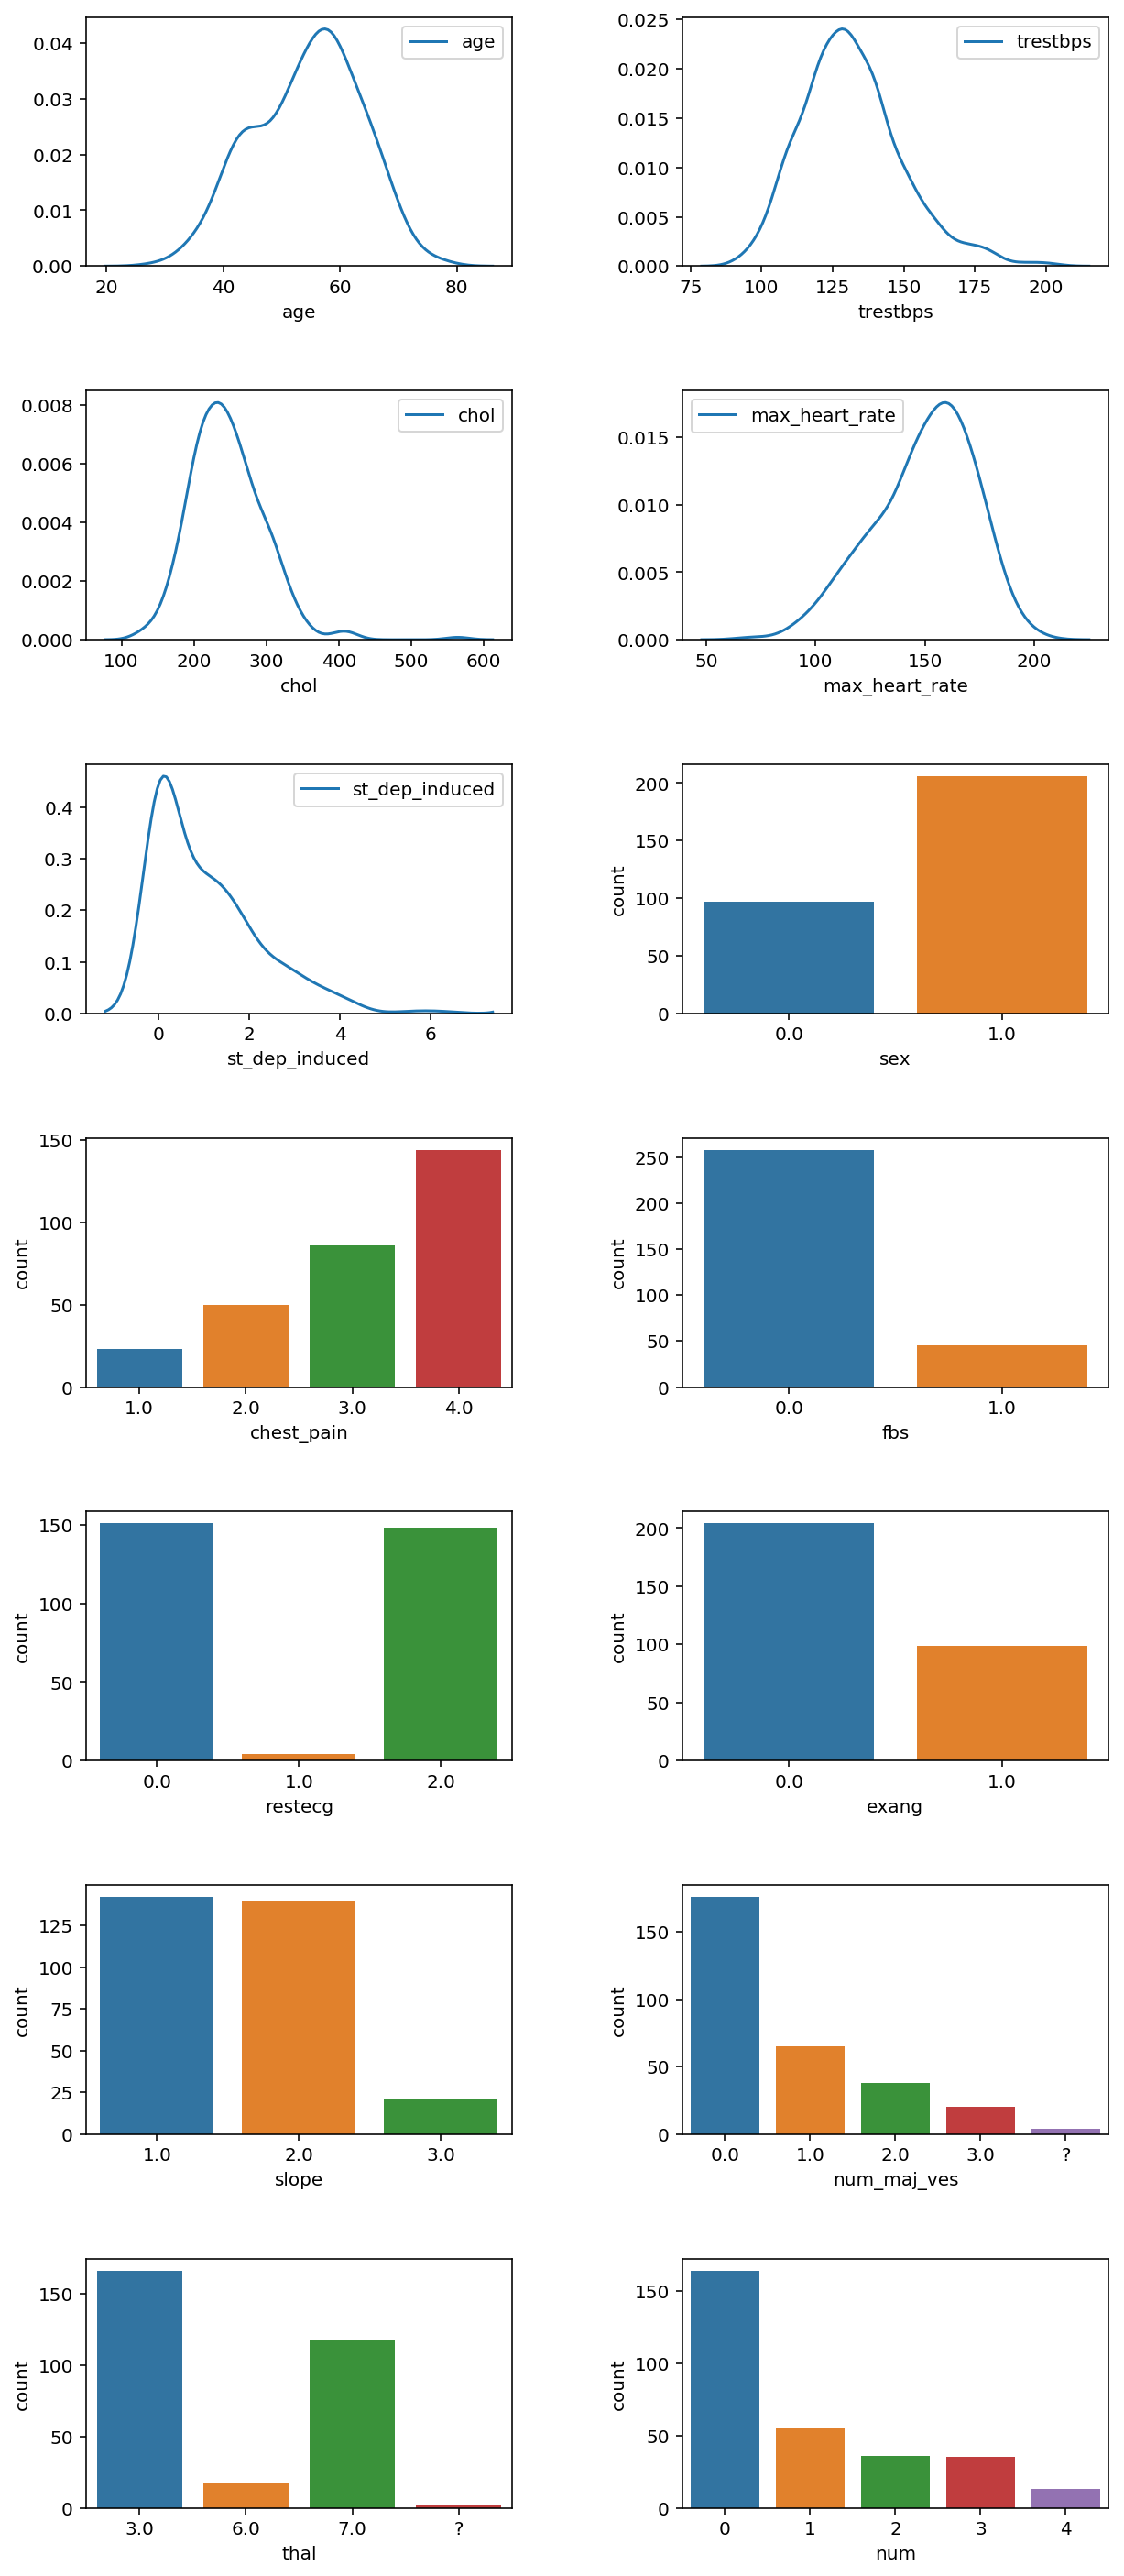

In [4]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10, 25))
ax = ax.reshape(-1)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
for i, col in enumerate(heart_df.select_dtypes(exclude="category").columns):
    sns.kdeplot(heart_df[col], ax=ax[i])
    ax[i].set_xlabel(col)
for i, col in enumerate(heart_df.select_dtypes(include="category").columns):
    i += 5
    sns.countplot(x=col, data=heart_df, ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("count")

## Parkinsons dataset
### Attribute Information

##### Training sample information
Each subject has 26 voice samples including sustained vowels, numbers, words and short sentences. The voice samples in the training data file are given in the following order:

1: sustained vowel (aaaâ€¦â€¦)

2: sustained vowel (oooâ€¦...)

3: sustained vowel (uuuâ€¦...)

4-13: numbers from 1 to 10

14-17: short sentences

18-26: words

##### Testing sample information
28 PD patients are asked to say only the sustained vowels 'a' and 'o' three times respectively which makes a total of 168 recordings (each subject has 6 voice samples) The voice samples in the test data file are given in the following order:

1-3: sustained vowel (aaaâ€¦â€¦)

4-6: sustained vowel (oooâ€¦â€¦) 

##### Training Data File

column 1: Subject id

column 2-27: features

features 1-5: Jitter (local), Jitter (local, absolute), Jitter (rap), Jitter (ppq5), Jitter (ddp)

features 6-11: Shimmer (local), Shimmer (local, dB), Shimmer (apq3), Shimmer (apq5), Shimmer (apq11), Shimmer (dda)

features 12-14: AC, NTH, HTN

features 15-19: Median pitch, Mean pitch, Standard deviation, Minimum pitch, Maximum pitch

features 20-23: Number of pulses, Number of periods, Mean period, Standard deviation of period

features 24-26: Fraction of locally unvoiced frames, Number of voice breaks, Degree of voice breaks

column 28: UPDRS (Unified Parkinson's Disease Rating Scale)

column 29: class information

##### Test Data File

column 1: Subject id

column 2-27: same features

column 28: class information 

In [5]:
park_df = pd.read_csv('../data/parkinson/train_data.txt',
                      delimiter=',',
                      header=None)

park_df = park_df.rename(columns={0:"subject_id",
                         28:"class",
                         27:"UPDRS"})

park_df.set_index("subject_id", inplace=True)
park_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,UPDRS,class
subject_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,0.897708,0.152955,11.987,195.952,195.222,4.692,186.593,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1
1,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,7.670,11.381,0.935717,0.078695,13.705,195.535,192.316,7.512,177.299,200.638,85,84,0.005199,0.000245,4.348,0,0.000,23,1
1,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,7.127,10.951,0.898598,0.147518,12.400,196.745,194.284,5.979,181.465,201.921,71,70,0.005137,0.000215,33.929,0,0.000,23,1
1,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,7.654,10.346,0.877616,0.217236,12.831,191.345,185.423,21.878,86.139,210.523,107,104,0.005282,0.000348,15.152,2,9.810,23,1


## Census-Income (KDD) Data Set
#### Data description

1.   91 distinct values for attribute #0 (age) continuous
2.    9 distinct values for attribute #1 (class of worker) nominal
3.   52 distinct values for attribute #2 (detailed industry recode) nominal
4.   47 distinct values for attribute #3 (detailed occupation recode) nominal
5.   17 distinct values for attribute #4 (education) nominal
6. 1240 distinct values for attribute #5 (wage per hour) continuous
7.    3 distinct values for attribute #6 (enroll in edu inst last wk) nominal
8.    7 distinct values for attribute #7 (marital stat) nominal
9.   24 distinct values for attribute #8 (major industry code) nominal
10.   15 distinct values for attribute #9 (major occupation code) nominal
11.    5 distinct values for attribute #10 (race) nominal
12.   10 distinct values for attribute #11 (hispanic origin) nominal
13.    2 distinct values for attribute #12 (sex) nominal
14.    3 distinct values for attribute #13 (member of a labor union) nominal
15.    6 distinct values for attribute #14 (reason for unemployment) nominal
16.    8 distinct values for attribute #15 (full or part time employment stat) nominal
17.  132 distinct values for attribute #16 (capital gains) continuous
18.  113 distinct values for attribute #17 (capital losses) continuous
19. 1478 distinct values for attribute #18 (dividends from stocks) continuous
20.    6 distinct values for attribute #19 (tax filer stat) nominal
21.    6 distinct values for attribute #20 (region of previous residence) nominal
22.   51 distinct values for attribute #21 (state of previous residence) nominal
23.   38 distinct values for attribute #22 (detailed household and family stat) nominal
24.    8 distinct values for attribute #23 (detailed household summary in household) nominal
25.   10 distinct values for attribute #24 (migration code-change in msa) nominal
26.    9 distinct values for attribute #25 (migration code-change in reg) nominal
27.   10 distinct values for attribute #26 (migration code-move within reg) nominal
28.    3 distinct values for attribute #27 (live in this house 1 year ago) nominal
29.    4 distinct values for attribute #28 (migration prev res in sunbelt) nominal
30.    7 distinct values for attribute #29 (num persons worked for employer) continuous
31.    5 distinct values for attribute #30 (family members under 18) nominal
32.   43 distinct values for attribute #31 (country of birth father) nominal
33.   43 distinct values for attribute #32 (country of birth mother) nominal
34.   43 distinct values for attribute #33 (country of birth self) nominal
35.    5 distinct values for attribute #34 (citizenship) nominal
36.    3 distinct values for attribute #35 (own business or self employed) nominal
37.    3 distinct values for attribute #36 (fill inc questionnaire for veteran's admin) nominal
38.    3 distinct values for attribute #37 (veterans benefits) nominal
39.   53 distinct values for attribute #38 (weeks worked in year) continuous
40.    2 distinct values for attribute #39 (year) nominal

In [6]:
cols =  ["age","class of worker","detailed industry recode","detailed occupation recode",
         "education","wage per hour","enroll in edu inst last wk","marital stat",
         "major industry code","major occupation code","race","hispanic origin","sex",
         "member of a labor union","reason for unemployment","full or part time employment stat",
         "capital gains","capital losses","dividends from stocks","tax filer stat",
         "region of previous residence","state of previous residence",
         "detailed household and family stat","detailed household summary in household", "instance weight",
         "migration code-change in msa","migration code-change in reg",
         "migration code-move within reg","live in this house 1 year ago",
         "migration prev res in sunbelt","num persons worked for employer",
         "family members under 18","country of birth father","country of birth mother",
         "country of birth self","citizenship","own business or self employed",
         "fill inc questionnaire for veteran's admin","veterans benefits","weeks worked in year",
         "year","binary class"]

In [7]:
census_df = pd.read_csv("../data/census/census-income.data", delimiter=",", header=None)
census_df.columns = cols
census_df.drop(columns='instance weight', axis=1, inplace=True)
census_df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,binary class
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Olympic Games Dataset

In [8]:
olympic_df = pd.read_csv("../data/olympic-games/athlete_events.csv", delimiter=",", header=0)
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [9]:
olympic_df = olympic_df[(np.isfinite(olympic_df['Height'])) & (np.isfinite(olympic_df['Weight']))]

In [10]:
medalist_df = olympic_df.loc[olympic_df.Medal.isin(['Gold', 'Bronze', 'Silver'])]
medalist_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


In [11]:
temp_df = medalist_df.groupby(by=['NOC', 'Sex', 'Year', 'Season']).count()
temp_df.loc[ 'FRA']

ID  Name  Age  Height  Weight  Team  Games  City  Sport  \
Sex Year Season                                                            
F   1948 Summer   3     3    3       3       3     3      3     3      3   
    1956 Summer   1     1    1       1       1     1      1     1      1   
    1964 Summer   3     3    3       3       3     3      3     3      3   
         Winter   4     4    4       4       4     4      4     4      4   
    1968 Summer   2     2    2       2       2     2      2     2      2   
         Winter   4     4    4       4       4     4      4     4      4   
    1972 Winter   2     2    2       2       2     2      2     2      2   
    1976 Summer   5     5    5       5       5     5      5     5      5   
         Winter   1     1    1       1       1     1      1     1      1   
    1980 Summer   6     6    6       6       6     6      6     6      6   
         Winter   1     1    1       1       1     1      1     1      1   
    1984 Summer   7     7    7       7       7     7      7     7      7   
         Winter   2     2    2       2       2     2      2     2      2   
    1988 Summer   2     2    2       2       2     2      2     2      2   
    1992 Summer   7     7    7       7       7     7      7     7      7   
         Winter   6     6    6       6       6     6      6     6      6   
    1994 Winter   5     5    5       5       5     5      5     5      5   
    1996 Summer  19    19   19      19      19    19     19    19     19   
    1998 Winter   3     3    3       3       3     3      3     3      3   
    2000 Summer  13    13   13      13      13    13     13    13     13   
    2002 Winter   6     6    6       6       6     6      6     6      6   
    2004 Summer  22    22   22      22      22    22     22    22     22   
    2006 Winter   6     6    6       6       6     6      6     6      6   
    2008 Summer  10    10   10      10      10    10     10    10     10   
    2010 Winter   8     8    8       8       8     8      8     8      8   
    2012 Summer  31    31   31      31      31    31     31    31     31   
    2014 Winter   3     3    3       3       3     3      3     3      3   
    2016 Summer  28    28   28      28      28    28     28    28     28   
M   1900 Summer   4     4    4       4       4     4      4     4      4   
    1906 Summer   2     2    2       2       2     2      2     2      2   
...              ..   ...  ...     ...     ...   ...    ...   ...    ...   
    1952 Summer  15    15   15      15      15    15     15    15     15   
    1956 Summer  12    12   12      12      12    12     12    12     12   
    1960 Summer  12    12   12      12      12    12     12    12     12   
         Winter   1     1    1       1       1     1      1     1      1   
    1964 Summer  28    28   28      28      28    28     28    28     28   
         Winter   2     2    2       2       2     2      2     2      2   
    1968 Summer  25    25   25      25      25    25     25    25     25   
         Winter   5     5    5       5       5     5      5     5      5   
    1972 Summer  22    22   22      22      22    22     22    22     22   
         Winter   1     1    1       1       1     1      1     1      1   
    1976 Summer  15    15   15      15      15    15     15    15     15   
    1980 Summer  23    23   23      23      23    23     23    23     23   
    1984 Summer  60    60   60      60      60    60     60    60     60   
         Winter   1     1    1       1       1     1      1     1      1   
    1988 Summer  27    27   27      27      27    27     27    27     27   
         Winter   2     2    2       2       2     2      2     2      2   
    1992 Summer  50    50   50      50      50    50     50    50     50   
         Winter   6     6    6       6       6     6      6     6      6   
    1994 Winter   6     6    6       6       6     6      6     6      6   
    1996 Summer  32    32   32      32      32    32     32    32

In [12]:
male_medalist_summer = medalist_df.loc[(medalist_df['Sex'] == "M") & (medalist_df['Season'] == 'Summer')]
male_medalist_summer.describe()

,ID,Age,Height,Weight,Year
count,16691.000000,16676.000000,16691.000000,16691.000000,16691.000000
mean,69268.377209,25.769009,181.596130,79.314032,1982.736445
std,38784.308980,5.051983,10.495474,14.476500,25.217885
min,17.000000,13.000000,140.000000,41.000000,1896.000000
25%,36476.000000,22.000000,175.000000,70.000000,1968.000000
50%,69285.000000,25.000000,182.000000,78.000000,1988.000000
75%,102971.000000,28.000000,188.000000,88.000000,2004.000000
max,135554.000000,66.000000,223.000000,182.000000,2016.000000
